In [113]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [169]:
import pandas as pd
import geopandas as gpd
import sweden
import netherlands
import saopaulo
import australia
import population_representation as poprep
from matplotlib.patches import Patch, ConnectionPatch
import matplotlib.transforms as mplt
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import regions
import geostat
import plotly.express as px
import plotly
import plotly.graph_objects as pgo
from plotly.offline import init_notebook_mode

In [170]:
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['font.size'] = 18.0

# Sweden

In [171]:
region = "sweden"

In [172]:
swe_homes = poprep.twitter_home_locations(region)

In [173]:
mask = regions.counties.convex_hull.unary_union.convex_hull
census_homes = geostat.load(mask=regions.counties.convex_hull.unary_union.convex_hull)
swe_homes = swe_homes.to_crs(census_homes.crs)

/Users/kristofferek/miniconda3/envs/mscthesis/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning:

Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.



In [174]:
counties = regions.counties.set_index('ID')
municipalities = gpd.read_file("../../dbs/sweden_municipalities/sweden_municipalities.shp").rename(columns={"KnKod": "ID"}).set_index("ID")
counties = counties.to_crs(census_homes.crs)
municipalities = municipalities.to_crs(census_homes.crs)

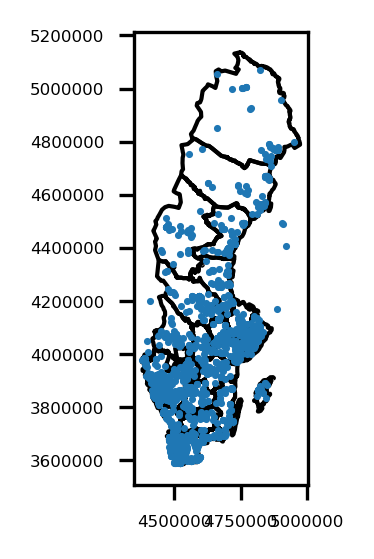

In [175]:
poprep.plot_home_locations(counties, swe_homes)

In [176]:
counties = poprep.align_populations(counties, swe_homes, census_homes)
municipalities = poprep.align_populations(municipalities, swe_homes, census_homes)

In [177]:
municipalities.sort_values('perc_of_census', ascending=False).tail(50)

KnNamn                                           geometry  \
ID                                                                         
1486        Strömstad  POLYGON ((4399035.143 3975457.979, 4397822.166...   
0665         Vaggeryd  POLYGON ((4564444.757 3843549.542, 4567565.405...   
1471           Götene  POLYGON ((4529971.832 3954616.462, 4531712.136...   
1060        Olofström  POLYGON ((4608732.504 3687226.777, 4604776.133...   
1262            Lomma  POLYGON ((4510634.413 3631329.974, 4512917.058...   
1270        Tomelilla  POLYGON ((4575016.627 3635496.517, 4575839.191...   
2083         Hedemora  POLYGON ((4667926.942 4169079.538, 4674608.238...   
0482             Flen  POLYGON ((4690718.932 3997445.481, 4694167.381...   
1861        Hallsberg  POLYGON ((4598843.020 3997690.442, 4591949.216...   
1881            Kumla  POLYGON ((4610607.828 4019522.228, 4616450.431...   
0382        Östhammar  POLYGON ((4786208.847 4174027.343, 4790823.816...   
1440              Ale  POLYGON ((4448306.226 3881639.314, 4450209.465...   
1783          Hagfors  POLYGON ((4539905.906 4092800.064, 4537667.665...   
2514            Kalix  POLYGON ((4908795.286 4797386.572, 4904807.410...   
1492             Åmål  POLYGON ((4468655.377 4006388.827, 4472089.271...   
1265            Sjöbo  POLYGON ((4547871.394 3622148.320, 4548430.531...   
0509          Ödeshög  POLYGON ((4607633.243 3907169.595, 4611855.111...   
2505       Arvidsjaur  POLYGON ((4726186.051 4730082.558, 4720525.049...   
0331             Heby  POLYGON ((4723947.486 4149792.683, 4729667.545...   
2510         Jokkmokk  POLYGON ((4733173.170 4921748.200, 4747080.485...   
2513        Överkalix  POLYGON ((4895904.068 4893291.989, 4898770.905...   
2518       Övertorneå  POLYGON ((4937577.045 4839970.808, 4925735.990...   
2303          Ragunda  POLYGON ((4596577.948 4484373.680, 4599458.944...   
2061     Smedjebacken  POLYGON ((4639061.788 4127832.796, 4639545.459...   
0821           Högsby  POLYGON ((4676854.794 3809462.825, 4681434.184...   
0512             Ydre  POLYGON ((4617935.084 3876433.063, 4616352.492...   
0885         Borgholm  POLYGON ((4738020.874 3800392.088, 4739027.850...   
1466       Herrljunga  POLYGON ((4508767.707 3890298.896, 4511816.532...   
1447        Gullspång  POLYGON ((4552161.615 3983978.726, 4552778.562...   
2583        Haparanda  POLYGON ((4937577.045 4839970.808, 4940337.977...   
2463            Åsele  POLYGON ((4717348.847 4606088.951, 4750225.019...   
0319       Älvkarleby  POLYGON ((4722903.732 4173026.886, 4723434.387...   
1497              Hjo  POLYGON ((4560295.894 3913081.721, 4557887.030...   
2425          Dorotea  POLYGON ((4592408.661 4613900.764, 4593770.130...   
2305           Bräcke  POLYGON ((4635673.685 4413496.058, 4627058.426...   
1864     Ljusnarsberg  POLYGON ((4583942.151 4119210.900, 4587857.180...   
1419            Tjörn  POLYGON ((4421761.300 3876299.576, 4421884.315...   
2034             Orsa  POLYGON ((4574890.509 4225859.675, 4567705.135...   
1904  Skinnskatteberg  POLYGON ((4649940.607 4073660.531, 4645961.658...   
1907       Surahammar  POLYGON ((4658414.867 4082983.214, 4657379.966...   
1764            Grums  POLYGON ((4481381.845 4046202.681, 4483637.393...   
1762         Munkfors  POLYGON ((4510229.851 4081717.912, 4509218.039...   
2403         Bjurholm  POLYGON ((4755791.425 4548748.496, 4752929.045...   
1785           Säffle  POLYGON ((4468655.377 4006388.827, 4462308.971...   
2409      Robertsfors  POLYGON ((4859507.319 4610380.716, 4854827.810...   
2417           Norsjö  POLYGON ((4789407.859 4661561.383, 4778895.592...   
1860             Laxå  POLYGON ((4591263.943 3974919.827, 4592487.464...   
1962          Norberg  POLYGON ((4639061.788 4127832.796, 4641126.465...   
0560          Boxholm  POLYGON ((4607633.243 3907169.595, 4606768.996...   
2418             Malå  POLYGON ((4704482.507 4704069.251, 4708067.781...   

      twitter  census  twitter_perc  census_perc  perc_of_cens

In [178]:
muni_with_nan = municipalities['twitter'] < 2.0
municipalities_copy = municipalities.copy()
municipalities_copy.loc[muni_with_nan, 'perc_of_census'] = None
municipalities_copy

KnNamn                                           geometry  \
ID                                                                        
0114  Upplands Väsby  POLYGON ((4769979.593 4069365.712, 4768818.294...   
0115      Vallentuna  POLYGON ((4786965.176 4072284.495, 4786177.857...   
0117       Österåker  MULTIPOLYGON (((4805850.745 4079179.705, 48041...   
0120          Värmdö  MULTIPOLYGON (((4803781.559 4049922.886, 48051...   
0123        Järfälla  POLYGON ((4763462.993 4064328.965, 4763565.402...   
...              ...                                                ...   
2580           Luleå  POLYGON ((4893863.371 4796978.757, 4889388.109...   
2581           Piteå  POLYGON ((4793098.270 4756462.909, 4800460.146...   
2582           Boden  POLYGON ((4865012.025 4790137.860, 4867120.865...   
2583       Haparanda  POLYGON ((4937577.045 4839970.808, 4940337.977...   
2584          Kiruna  POLYGON ((4666475.578 5069271.188, 4675802.731...   

      twitter  census  twitter_perc  census_perc  perc_of_census  
ID                                                                
0114     12.0   41491      0.003381     0.004194        0.806250  
0115      9.0   31141      0.002536     0.003148        0.805661  
0117     13.0   40074      0.003663     0.004051        0.904322  
0120     10.0   38224      0.002818     0.003864        0.729300  
0123     12.0   75305      0.003381     0.007612        0.444222  
...       ...     ...           ...          ...             ...  
2580     30.0   73320      0.008453     0.007411        1.140620  
2581     12.0   40890      0.003381     0.004133        0.818100  
2582      4.0   27540      0.001127     0.002784        0.404891  
2583      0.0    9583      0.000000     0.000969             NaN  
2584      9.0   23376      0.002536     0.002363        1.073284  

[290 rows x 7 columns]

/Users/kristofferek/miniconda3/envs/mscthesis/lib/python3.8/site-packages/geopandas/plotting.py:332: UserWarning:

The GeoSeries you are attempting to plot is empty. Nothing has been displayed.



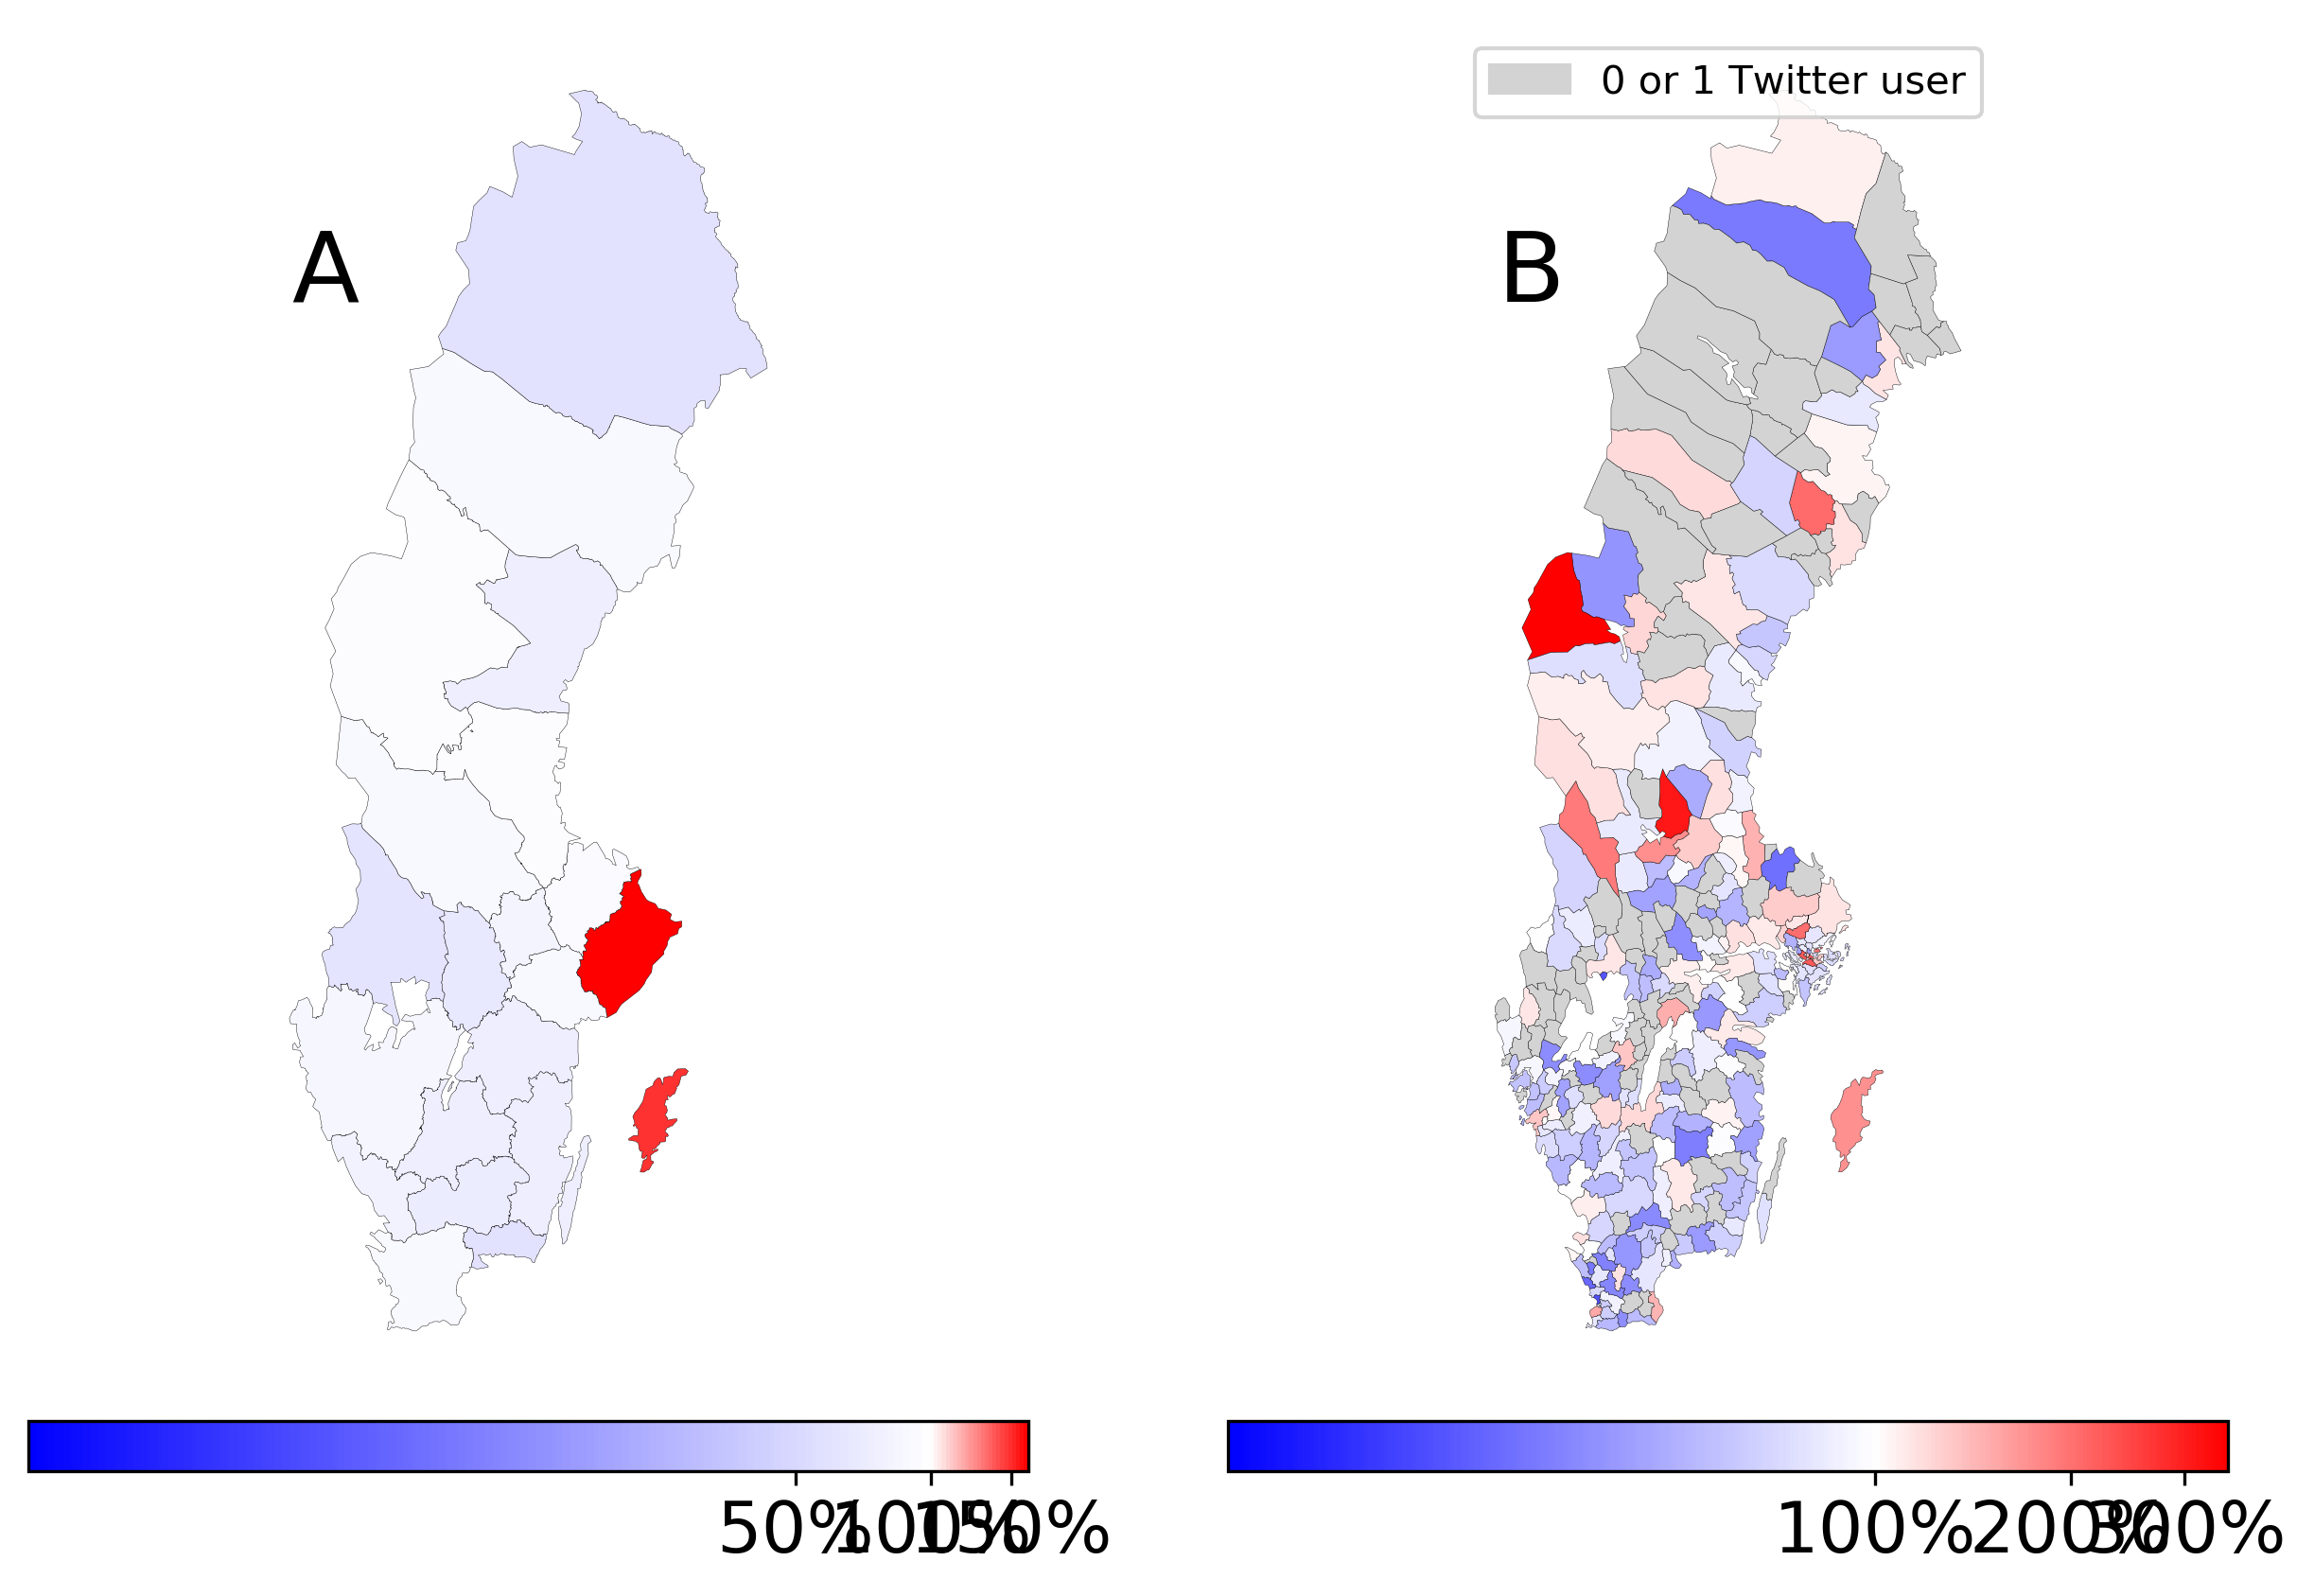

In [179]:
poprep.plot_geo_rep(counties, municipalities_copy, ticks1=[0, 0.5, 1, 1.5], ticks2=[0, 1, 2, 3])

In [180]:
ax0, ax1 = poprep.plot_corr(counties, municipalities)
ax0.set_xlim((0.001, 0.5))
ax0.set_ylim((0.001, 0.5))
ax1.set_xlim((0.00001, 0.5))
ax1.set_ylim((0.00001, 0.5))

(1e-05, 0.5)

# Netherlands

In [181]:
region = "netherlands"

In [182]:
neth_homes = poprep.twitter_home_locations(region)

In [183]:
mask = netherlands.municipalities.to_crs("EPSG:3035").convex_hull.unary_union.convex_hull
census_homes = geostat.load(mask=mask)

/Users/kristofferek/miniconda3/envs/mscthesis/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning:

Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.



In [184]:
counties = netherlands.counties
municipalities = netherlands.municipalities
counties = counties.to_crs(census_homes.crs)
counties = counties.rename(columns={'id':'ID'}).set_index('ID')
counties = counties[counties['name'] != 'Caribbean Netherlands']
municipalities = municipalities.to_crs(census_homes.crs)
municipalities = municipalities.rename(columns={'GM_CODE':'ID'}).set_index('ID')
neth_homes = neth_homes.to_crs(census_homes.crs)

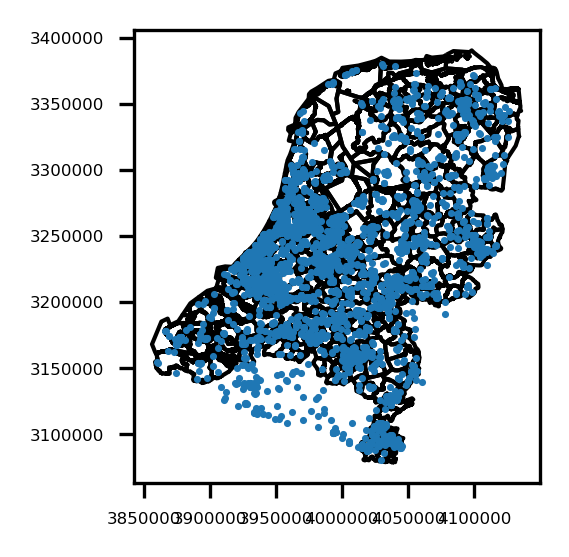

In [185]:
poprep.plot_home_locations(municipalities, neth_homes)

In [186]:
counties = poprep.align_populations(counties, neth_homes, census_homes)
municipalities = poprep.align_populations(municipalities, neth_homes, census_homes)

In [187]:
counties.sort_values('perc_of_census', ascending=False).head(3)

country           name         enname        locname offname  \
ID                                                                   
47654     NLD  North Holland  North Holland  Noord-Holland       0   
47407     NLD      Flevoland      Flevoland      Flevoland       0   
47667     NLD        Utrecht        Utrecht        Utrecht       0   

             boundary adminlevel wikidata               wikimedia  \
ID                                                                  
47654  administrative          4     Q701        nl:Noord-Holland   
47407  administrative          4     Q707            nl:Flevoland   
47667  administrative          4     Q776  nl:Utrecht (provincie)   

                 timestamp                     note                   path  \
ID                                                                           
47654  2019-09-01 22:13:02  Provincie Noord-Holland  0,2323309,47796,47654   
47407  2019-06-01 22:01:02                        0  0,2323309,47796,47407   
47667  2019-09-22 22:03:02        Provincie Utrecht  0,2323309,47796,47667   

                       rpath iso3166_2  \
ID                                       
47654  47654,47796,2323309,0     NL-NH   
47407  47407,47796,2323309,0     NL-FL   
47667  47667,47796,2323309,0     NL-UT   

                                                geometry  twitter   census  \
ID                                                                           
47654  MULTIPOLYGON (((3980954.946 3322924.467, 39809...     1415  2731078   
47407  POLYGON ((3986443.432 3285783.995, 3987436.493...      140   399662   
47667  POLYGON ((3964653.399 3236352.897, 3964655.423...      458  1315855   

       twitter_perc  census_perc  perc_of_census  
ID                                                
47654      0.271021     0.160440        1.689239  
47407      0.026815     0.023479        1.142100  
47667      0.087723     0.077301        1.134818

In [188]:
municipalities.sort_values('perc_of_census', ascending=False).head(15)

GM_NAAM WATER       OAD      STED  AANT_INW  AANT_MAN  \
ID                                                                   
GM0096      Vlieland   NEE       197         5      1085       533   
GM0096      Vlieland    JA -99999999 -99999999 -99999999 -99999999   
GM0093  Terschelling   NEE       241         5      4859      2579   
GM0093  Terschelling    JA -99999999 -99999999 -99999999 -99999999   
GM0363     Amsterdam   NEE      6004         1    844947    418127   
GM0363     Amsterdam    JA -99999999 -99999999 -99999999 -99999999   
GM0060       Ameland    JA -99999999 -99999999 -99999999 -99999999   
GM0060       Ameland   NEE       250         5      3633      1799   
GM0050      Zeewolde   NEE       797         4     22457     11549   
GM0050      Zeewolde    JA -99999999 -99999999 -99999999 -99999999   
GM0402     Hilversum   NEE      2668         1     88888     43611   
GM0473     Zandvoort   NEE      1799         2     16899      8172   
GM0473     Zandvoort    JA -99999999 -99999999 -99999999 -99999999   
GM0344       Utrecht   NEE      3379         1    343038    167587   
GM0193        Zwolle   NEE      1973         2    125548     61727   

        AANT_VROUW  P_00_14_JR  P_15_24_JR  P_25_44_JR  ...  P_OVER_NW  \
ID                                                      ...              
GM0096         552          13          12          23  ...          1   
GM0096   -99999999   -99999999   -99999999   -99999999  ...  -99999999   
GM0093        2280          12          17          21  ...          1   
GM0093   -99999999   -99999999   -99999999   -99999999  ...  -99999999   
GM0363      426820          15          13          35  ...         12   
GM0363   -99999999   -99999999   -99999999   -99999999  ...  -99999999   
GM0060   -99999999   -99999999   -99999999   -99999999  ...  -99999999   
GM0060        1834          17           9          23  ...          1   
GM0050       10908          19          15          24  ...          4   
GM0050   -99999999   -99999999   -99999999   -99999999  ...  -99999999   
GM0402       45277          17          11          26  ...          6   
GM0473        8727          13           9          21  ...          5   
GM0473   -99999999   -99999999   -99999999   -99999999  ...  -99999999   
GM0344      175451          17          16          36  ...          7   
GM0193       63821          18          13          29  ...          5   

         OPP_TOT  OPP_LAND  OPP_WATER  \
ID                                      
GM0096     31580      3544      28036   
GM0096 -99999999 -99999999  -99999999   
GM0093     67399      8345      59054   
GM0093 -99999999 -99999999  -99999999   
GM0363     21949     16533       5416   
GM0363 -99999999 -99999999  -99999999   
GM0060 -99999999 -99999999  -99999999   
GM0060     26850      5865      20984   
GM0050     26886     24748       2137   
GM0050 -99999999 -99999999  -99999999   
GM0402      4635      4561         73   
GM0473      4397      3211       1186   
GM0473 -99999999 -99999999  -99999999   
GM0344      9921      9415        506   
GM0193     11936     11131        805   

                                                 geometry  twitter  census  \
ID                                                                           
GM0096  MULTIPOLYGON (((3996862.062 3365674.670, 39968...      4.0    2300   
GM0096  MULTIPOLYGON (((3993268.890 3365382.665, 39932...      4.0    2300   
GM0093  MULTIPOLYGON (((4003813.033 3359482.135, 40038...      8.0    7539   
GM0093  POLYGON ((4025876.409 3382805.375, 4027775.457...      8.0    7539   
GM0363  MULTIPOLYGON (((3981727.534 3262982.518, 39817...    790.0  861652   
GM0363  MULTIPOLYGON (((3978736.791 3262388.485, 39787...    790.0  861652   
GM0060  POLYGON ((4043289.798 3373176.952, 4041165.781...      3.0    4041   
GM0060  MULTIPOLYGON (((4033179.813 3376645.065, 40331...      3.0    4041   
GM0050  MULTIPOLYGON (((4022568.123 3260239.686, 40225...     18.0   29838   
GM0050 

In [189]:
muni_with_nan = municipalities['twitter'] < 2.0
municipalities_copy = municipalities.copy()
municipalities_copy.loc[muni_with_nan, 'perc_of_census'] = None
municipalities_copy

GM_NAAM WATER       OAD      STED  AANT_INW  AANT_MAN  \
ID                                                                         
GM0003          Appingedam   NEE      1045         3     11971      5802   
GM0005               Bedum   NEE       678         4     10479      5241   
GM0007        Bellingwedde   NEE       151         5      8919      4534   
GM0009            Ten Boer   NEE       371         5      7288      3607   
GM0010            Delfzijl   NEE       680         4     24965     12560   
...                    ...   ...       ...       ...       ...       ...   
GM1924  Goeree-Overflakkee    JA -99999999 -99999999 -99999999 -99999999   
GM1930          Nissewaard    JA -99999999 -99999999 -99999999 -99999999   
GM1940    De Fryske Marren    JA -99999999 -99999999 -99999999 -99999999   
GM1942        Gooise Meren    JA -99999999 -99999999 -99999999 -99999999   
GM9999                   0     B -99999999 -99999999 -99999999 -99999999   

        AANT_VROUW  P_00_14_JR  P_15_24_JR  P_25_44_JR  ...  P_OVER_NW  \
ID                                                      ...              
GM0003        6169          15          10          21  ...          2   
GM0005        5238          16          12          21  ...          2   
GM0007        4385          13           9          18  ...          2   
GM0009        3681          18          11          21  ...          2   
GM0010       12405          14          10          20  ...          4   
...            ...         ...         ...         ...  ...        ...   
GM1924   -99999999   -99999999   -99999999   -99999999  ...  -99999999   
GM1930   -99999999   -99999999   -99999999   -99999999  ...  -99999999   
GM1940   -99999999   -99999999   -99999999   -99999999  ...  -99999999   
GM1942   -99999999   -99999999   -99999999   -99999999  ...  -99999999   
GM9999   -99999999   -99999999   -99999999   -99999999  ...  -99999999   

         OPP_TOT  OPP_LAND  OPP_WATER  \
ID                                      
GM0003      2458      2378         80   
GM0005      4496      4454         41   
GM0007     11009     10837        172   
GM0009      4573      4531         42   
GM0010     22750     13313       9437   
...          ...       ...        ...   
GM1924 -99999999 -99999999  -99999999   
GM1930 -99999999 -99999999  -99999999   
GM1940 -99999999 -99999999  -99999999   
GM1942 -99999999 -99999999  -99999999   
GM9999 -99999999 -99999999  -99999999   

                                                 geometry  twitter  census  \
ID                                                                           
GM0003  POLYGON ((4108186.561 3361238.606, 4108190.140...      3.0   13190   
GM0005  POLYGON ((4091502.958 3358736.372, 4091504.902...      1.0   20178   
GM0007  POLYGON ((4121901.161 3337863.709, 4121897.592...      1.0   12059   
GM0009  POLYGON ((4103810.736 3360893.032, 4103811.766...      3.0    8669   
GM0010  MULTIPOLYGON (((4127860.352 3361020.159, 41278...      2.0   33179   
...                                                   ...      ...     ...   
GM1924  MULTIPOLYGON (((3922689.082 3187764.823, 39226...      8.0   54755   
GM1930  POLYGON ((3918743.378 3206208.023, 3918743.377...     14.0  116052   
GM1940  POLYGON ((4028546.895 3313750.812, 4028547.436...     10.0   63538   
GM1942  MULTIPOLYGON (((3995686.927 3256921.278, 39958...     15.0   72863   
GM9999  MULTIPOLYGON (((3968031.807 3160362.966, 39680...      0.0    5939   

        twitter_perc  census_perc  perc_of_census  
ID                                                 
GM0003      0.000417     0.000502        0.831232  
GM0005      0.000139     0.000768             NaN  
GM0007      0.000139     0.000459             NaN  
GM0009      0.000417     0.000330        1.264730  
GM0010      0.000278     0.001263        0.220299  
...              ...          ...             ...  
GM1924      0.001113     0.002085        0.533964  
GM1930      0.001948     0.004418        0.440881 

In [190]:
poprep.plot_geo_rep(counties, municipalities_copy, ticks1=[0, 0.5, 1, 1.5], ticks2=[0, 1, 3, 6])

/Users/kristofferek/miniconda3/envs/mscthesis/lib/python3.8/site-packages/geopandas/plotting.py:332: UserWarning:

The GeoSeries you are attempting to plot is empty. Nothing has been displayed.



(1e-05, 0.5)

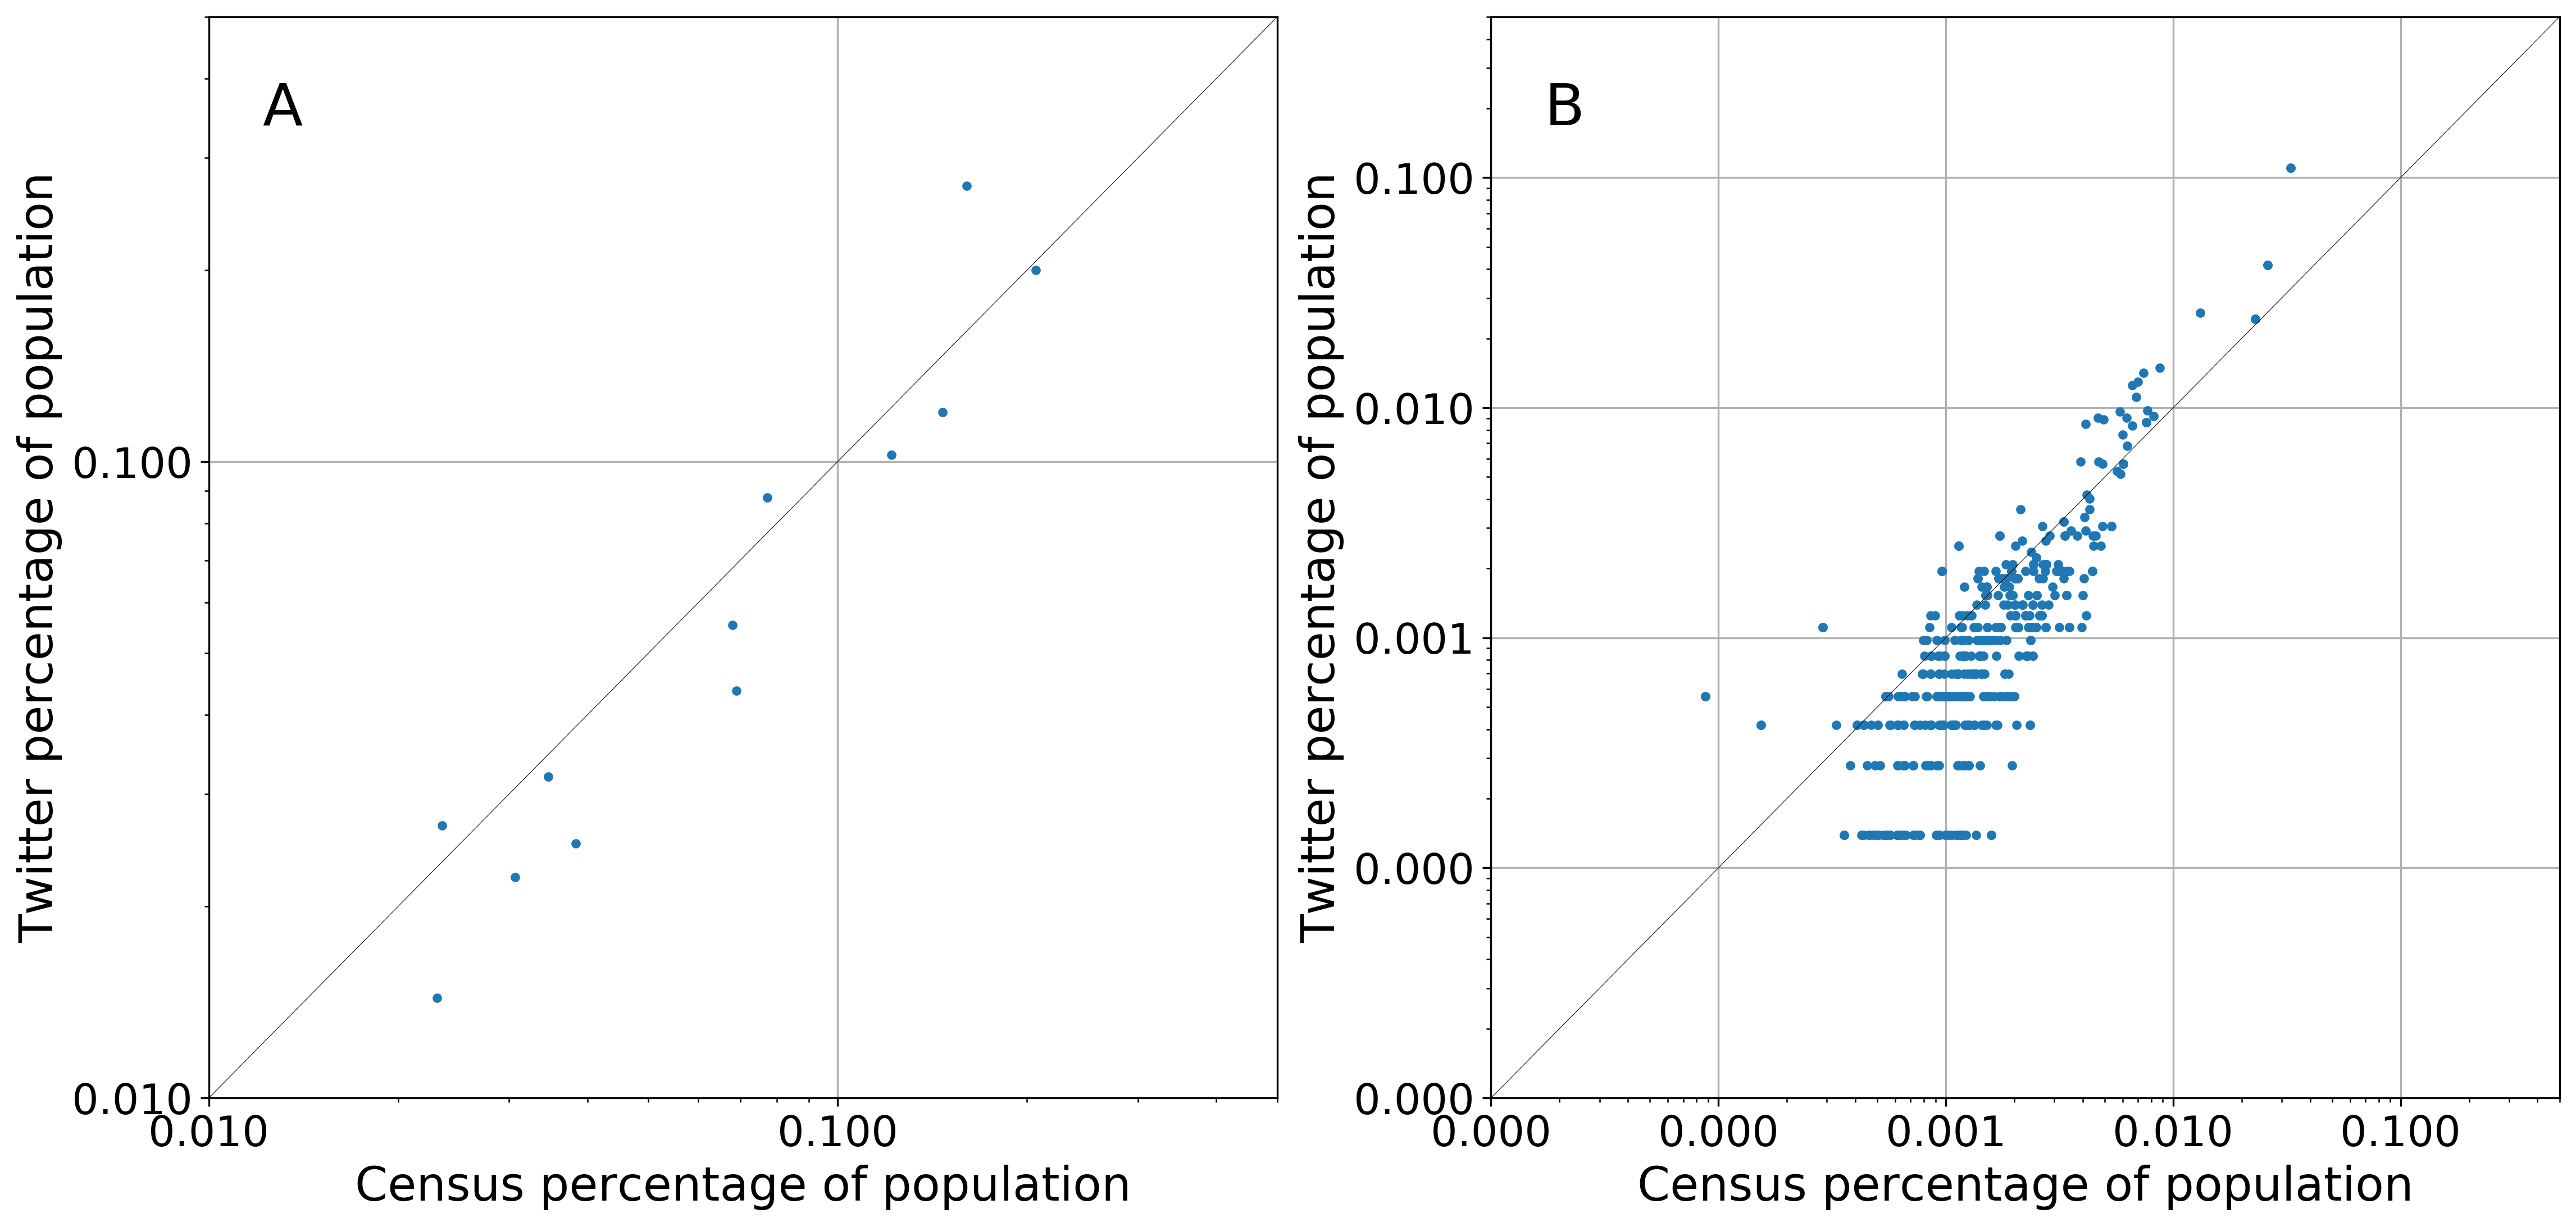

In [191]:
ax0, ax1 = poprep.plot_corr(counties, municipalities)
ax0.set_xlim((0.01, 0.5))
ax0.set_ylim((0.01, 0.5))
ax1.set_xlim((0.00001, 0.5))
ax1.set_ylim((0.00001, 0.5))

# Sao Paulo

In [192]:
sao_twitter = poprep.twitter_home_locations("saopaulo").to_crs(saopaulo.metric_epsg)

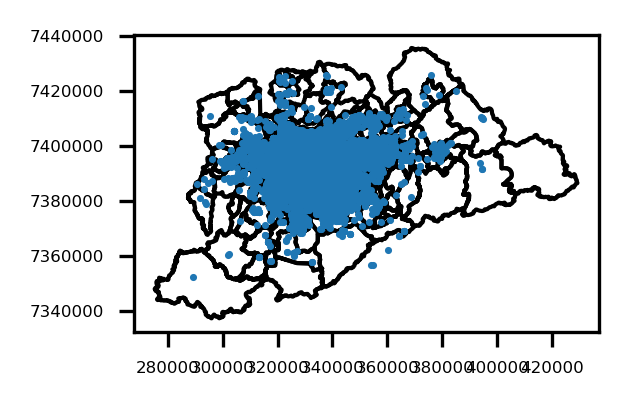

In [193]:
census_homes = saopaulo.zone_populations()
census_homes = census_homes[census_homes['census_population'] != 0.]
poprep.plot_home_locations(census_homes, sao_twitter)

In [194]:
study_zone = poprep.align_populations_aus_sao(census_homes, sao_twitter)
study_zone.sort_values('perc_of_census', ascending=False).head(5)

geometry  census_population  \
zone                                                                         
92    POLYGON Z ((329415.917 7397362.208 0.000, 3296...         324.000065   
94    POLYGON Z ((327970.633 7397510.783 0.000, 3279...        3993.001051   
131   POLYGON Z ((334497.219 7398954.266 0.000, 3344...        1227.000245   
62    POLYGON Z ((331636.998 7389908.935 0.000, 3316...        4564.998437   
1     POLYGON Z ((333739.415 7394619.838 0.000, 3337...        3262.000949   

      twitter  twitter_perc  census_perc  perc_of_census  
zone                                                      
92       22.0      0.002059     0.000016      132.305528  
94      107.0      0.010013     0.000192       52.213735  
131      21.0      0.001965     0.000059       33.348404  
62       74.0      0.006925     0.000219       31.585772  
1        52.0      0.004866     0.000157       31.061303

In [195]:
zone_with_nan = study_zone['twitter'] < 2.0
study_zone_copy = study_zone.copy()
study_zone_copy.loc[zone_with_nan, 'perc_of_census'] = None
study_zone_copy

geometry  census_population  \
zone                                                                         
1     POLYGON Z ((333739.415 7394619.838 0.000, 3337...        3262.000949   
2     POLYGON Z ((333106.146 7395425.480 0.000, 3331...        5695.000762   
3     POLYGON Z ((333353.211 7393933.156 0.000, 3332...       17130.000980   
4     POLYGON Z ((332742.619 7394795.328 0.000, 3327...       24088.998880   
5     POLYGON Z ((332983.962 7395262.578 0.000, 3330...       14955.999880   
...                                                 ...                ...   
513   POLYGON Z ((300336.368 7389696.621 0.000, 3003...        3587.000811   
514   POLYGON Z ((303326.146 7397176.350 0.000, 3033...      104625.996713   
515   POLYGON Z ((303292.377 7397174.790 0.000, 3033...      120821.008206   
516   POLYGON Z ((296271.998 7398946.927 0.000, 2961...      131607.978849   
517   POLYGON Z ((291856.851 7406803.921 0.000, 2918...       18107.003304   

      twitter  twitter_perc  census_perc  perc_of_census  
zone                                                      
1        52.0      0.004866     0.000157       31.061303  
2         8.0      0.000749     0.000274        2.737137  
3        54.0      0.005053     0.000823        6.142381  
4        97.0      0.009077     0.001157        7.846092  
5       108.0      0.010107     0.000718       14.070473  
...       ...           ...          ...             ...  
513       0.0      0.000000     0.000172             NaN  
514      14.0      0.001310     0.005025        0.260729  
515      10.0      0.000936     0.005803        0.161272  
516      39.0      0.003650     0.006321        0.577408  
517       1.0      0.000094     0.000870             NaN  

[492 rows x 6 columns]

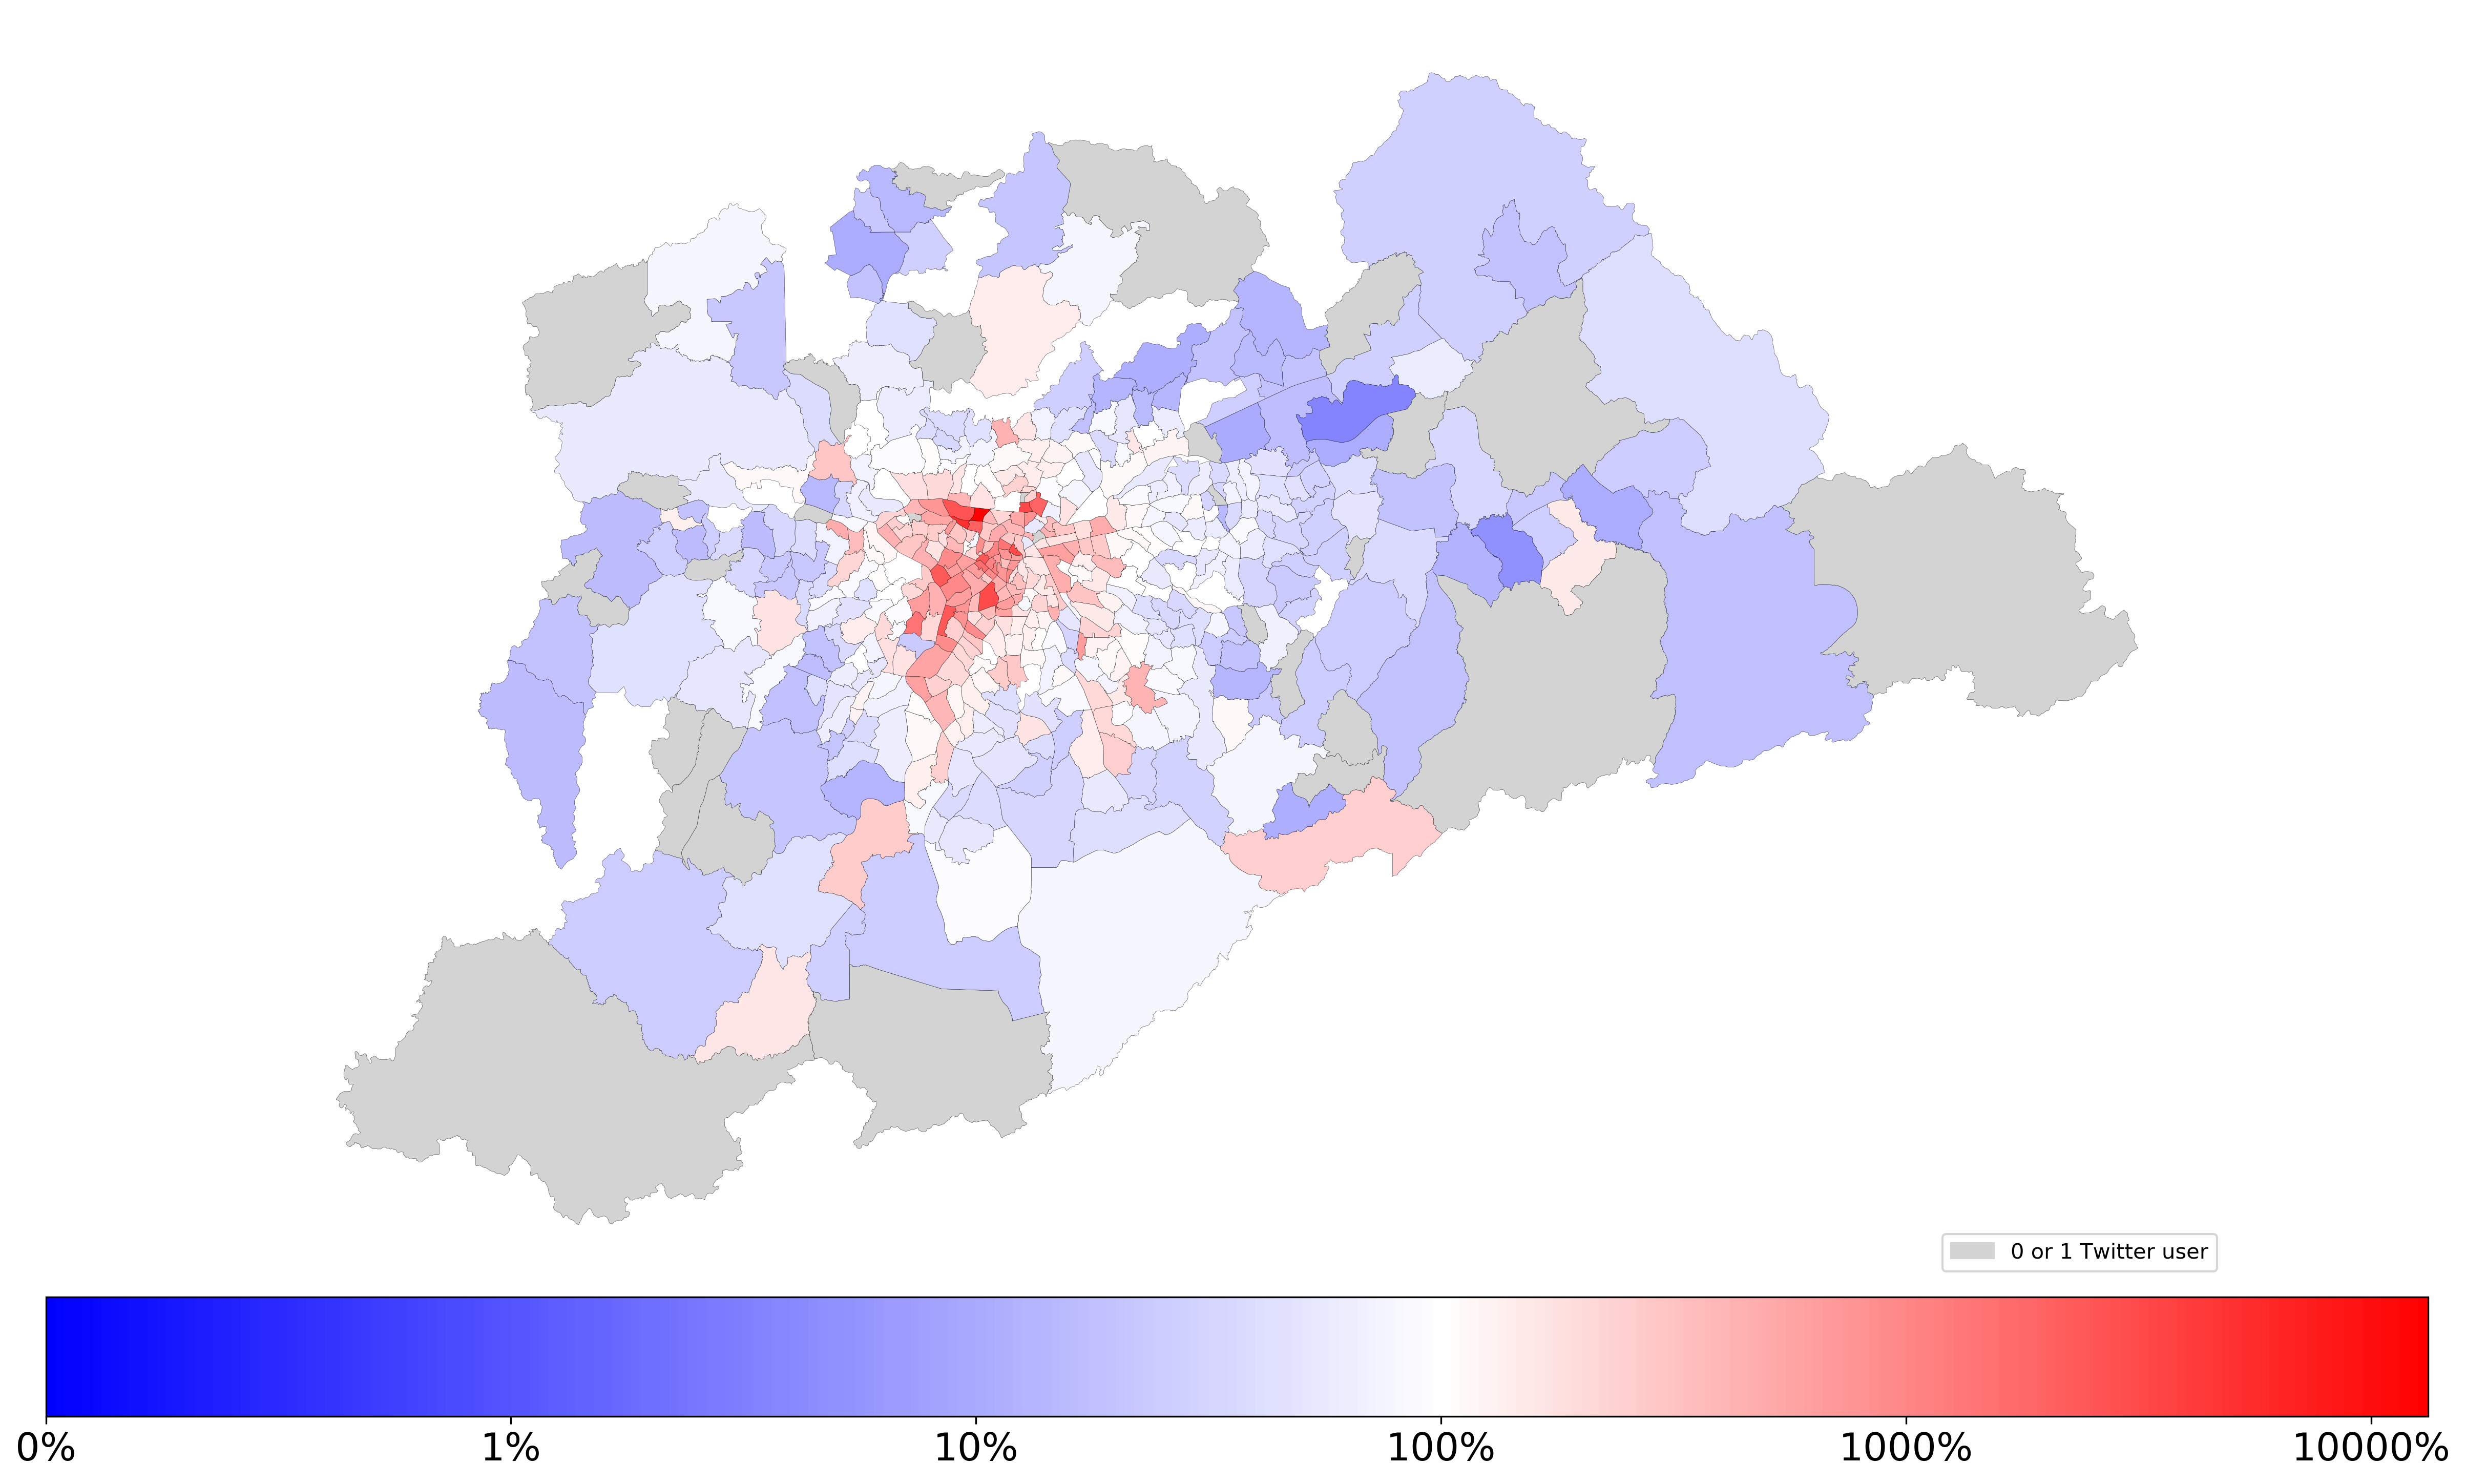

In [196]:
poprep.plot_geo_rep_aus_sao(study_zone_copy)

(1e-05, 0.5)

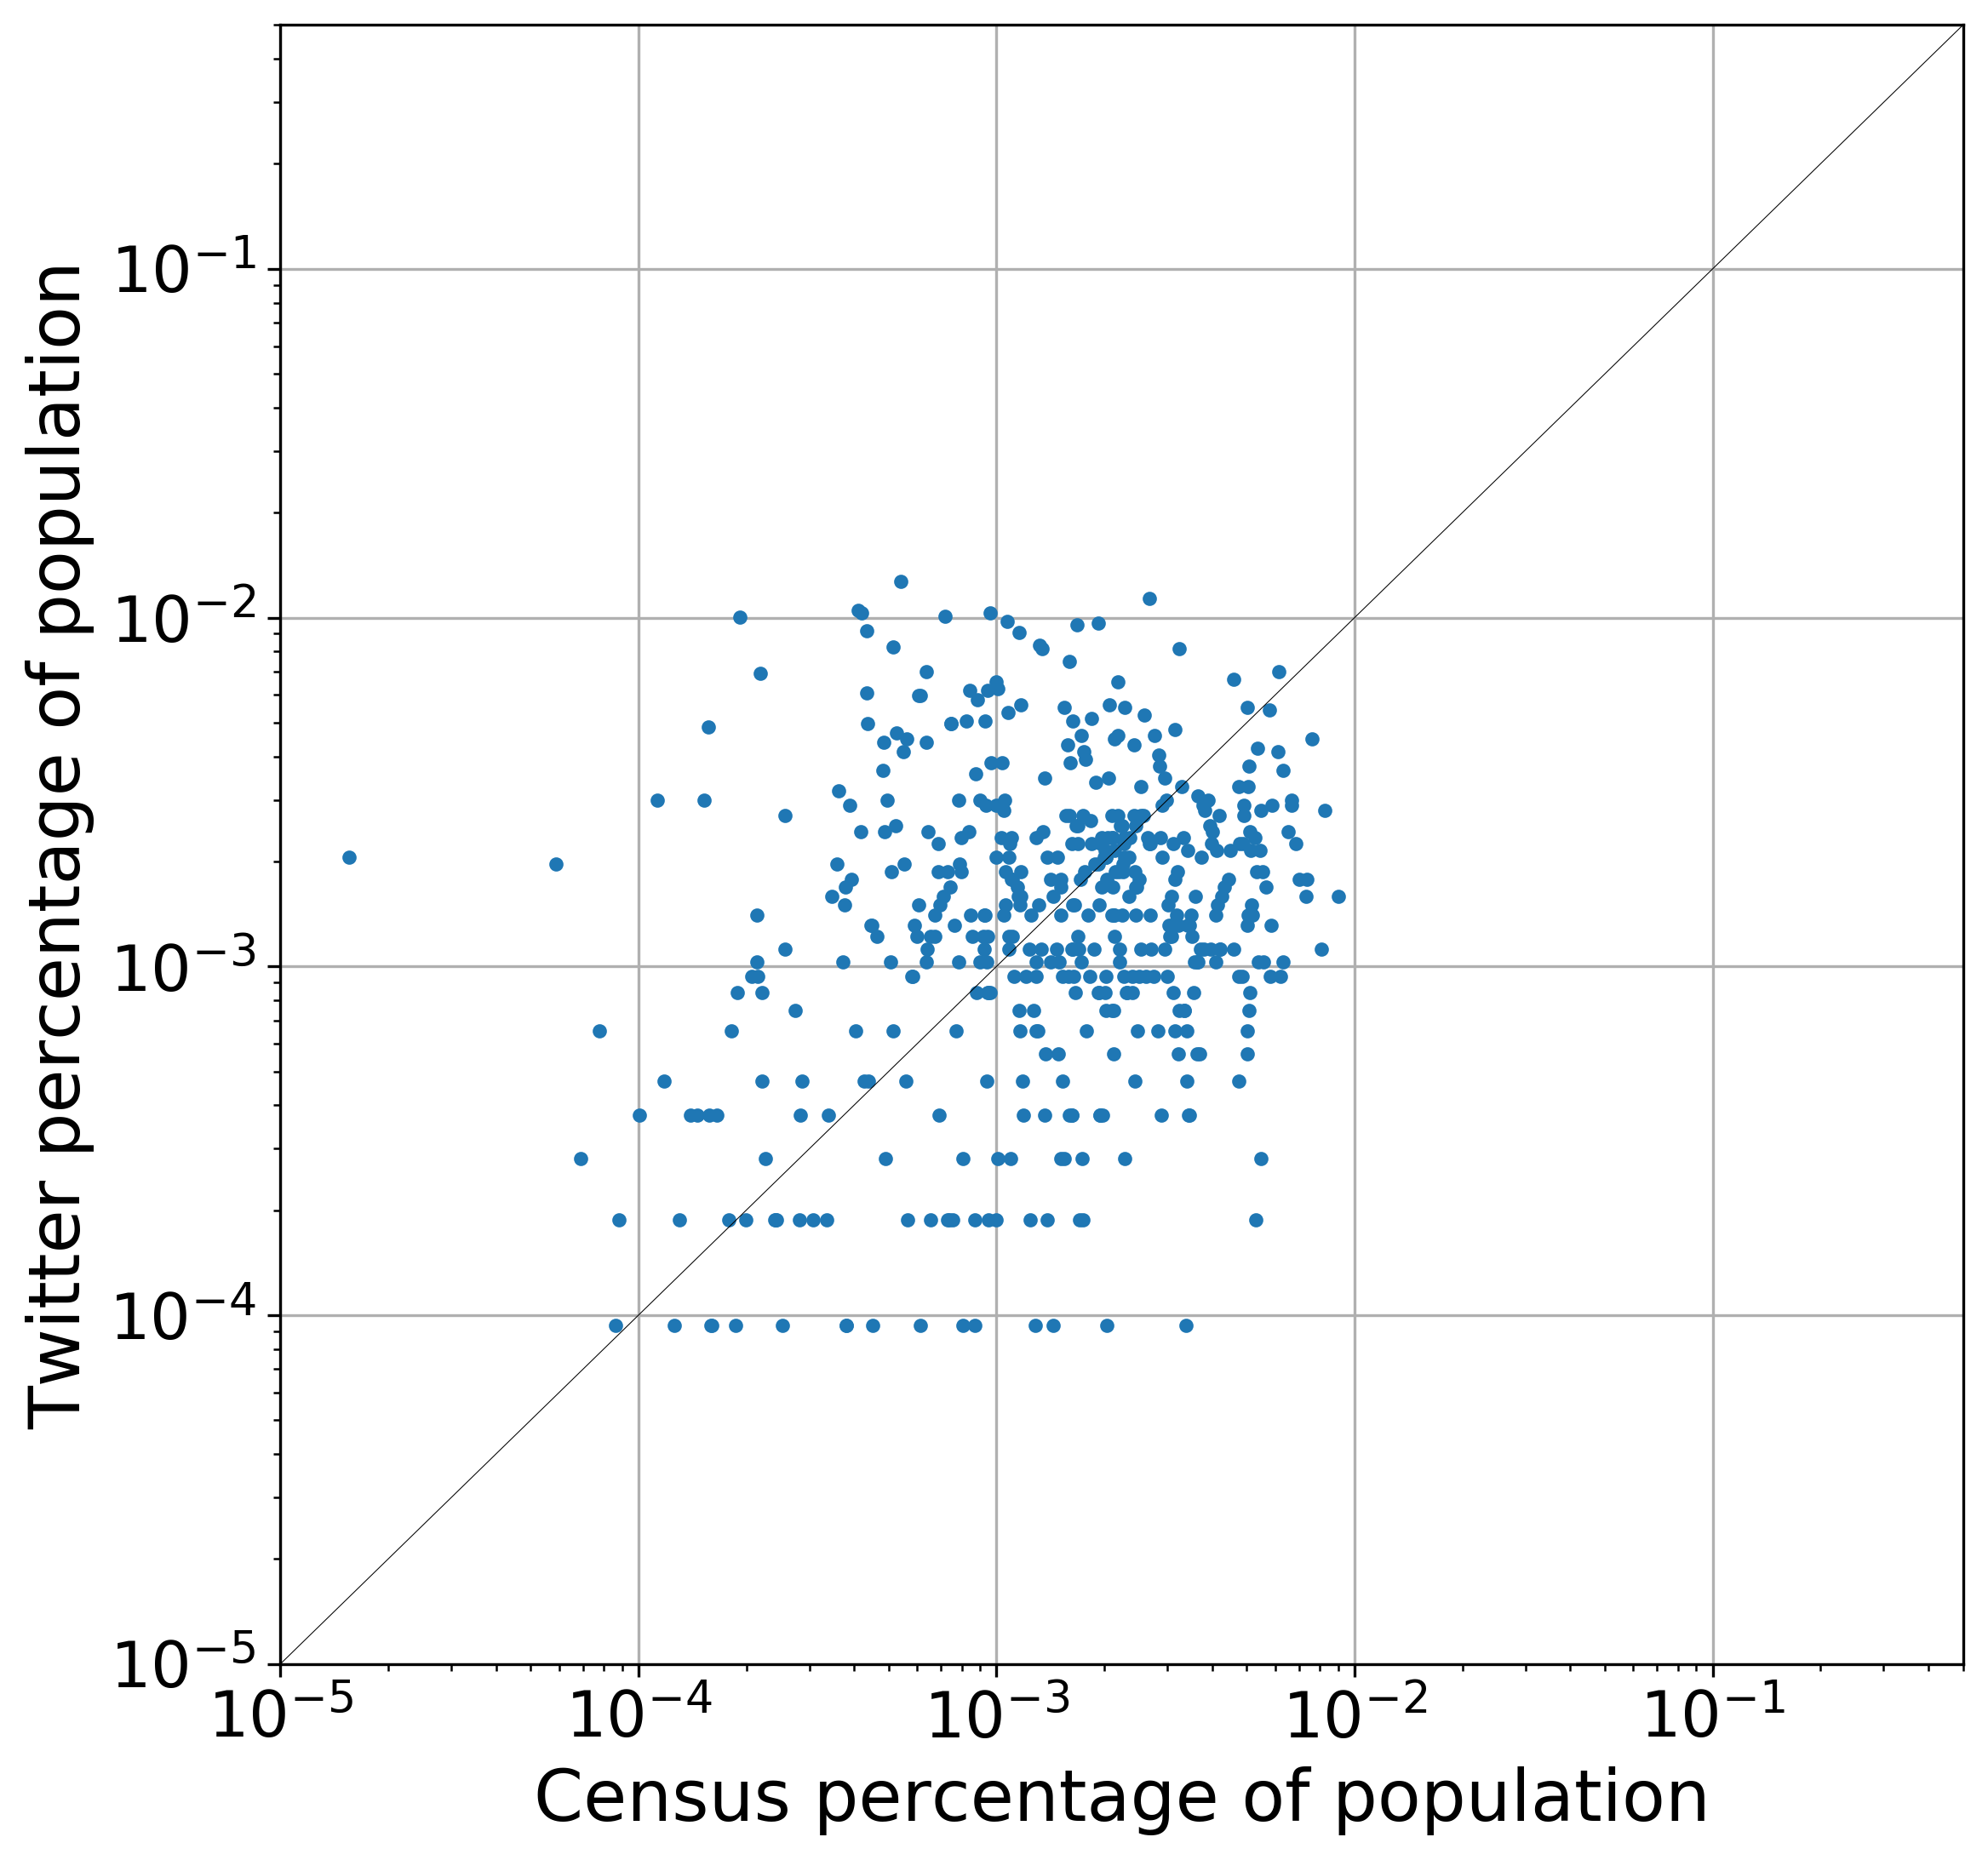

In [197]:
ax = poprep.plot_corr_aus_sao(study_zone)
ax.set_xlim((0.00001, 0.5))
ax.set_ylim((0.00001, 0.5))

# Australia

In [198]:
aus_twitter = poprep.twitter_home_locations("australia").to_crs(australia.metric_epsg)

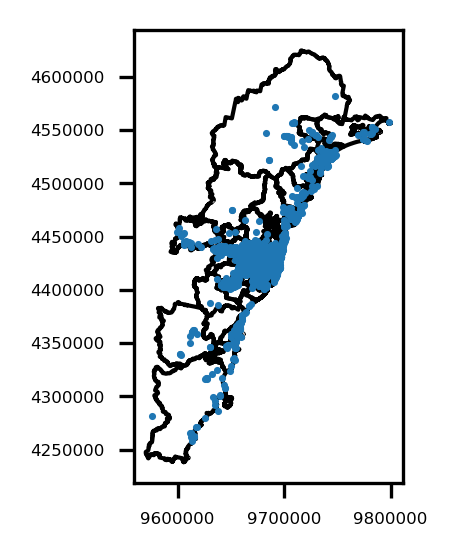

In [199]:
census_homes = australia.zone_populations()
census_homes = census_homes[census_homes['census_population'] != 0.]
poprep.plot_home_locations(census_homes, aus_twitter)

In [200]:
study_zone = poprep.align_populations_aus_sao(census_homes, aus_twitter)
study_zone.sort_values('perc_of_census', ascending=False).head(5)

SA3_NAME16 SA4_CODE16  \
zone                                                    
11703                    Sydney Inner City        117   
11801              Eastern Suburbs - North        118   
12002                           Leichhardt        120   
12201                                Manly        122   
11702  Marrickville - Sydenham - Petersham        117   

                          SA4_NAME16 GCC_CODE16      GCC_NAME16 STE_CODE16  \
zone                                                                         
11703  Sydney - City and Inner South      1GSYD  Greater Sydney          1   
11801       Sydney - Eastern Suburbs      1GSYD  Greater Sydney          1   
12002            Sydney - Inner West      1GSYD  Greater Sydney          1   
12201      Sydney - Northern Beaches      1GSYD  Greater Sydney          1   
11702  Sydney - City and Inner South      1GSYD  Greater Sydney          1   

            STE_NAME16  AREASQKM16  \
zone                                 
11703  New South Wales     25.0641   
11801  New South Wales     26.1849   
12002  New South Wales     10.6577   
12201  New South Wales     14.3455   
11702  New South Wales     12.6699   

                                                geometry  census_population  \
zone                                                                          
11703  MULTIPOLYGON (((9690566.015 4425031.388, 96905...             212000   
11801  MULTIPOLYGON (((9694767.102 4425675.221, 96947...             133000   
12002  MULTIPOLYGON (((9685867.280 4426261.837, 96858...              59000   
12201  POLYGON ((9691864.508 4432033.891, 9691868.906...              40000   
11702  POLYGON ((9683339.934 4420505.768, 9683347.483...              57000   

       twitter  twitter_perc  census_perc  perc_of_census  
zone                                                       
11703      906      0.283924     0.034624        8.200301  
11801      344      0.107803     0.021721        4.963000  
12002       83      0.026011     0.009636        2.699377  
12201       55      0.017236     0.006533        2.638397  
11702       64      0.020056     0.009309        2.154481

In [201]:
study_zone.sort_values('twitter')

SA3_NAME16 SA4_CODE16  \
zone                                                    
12404                   Richmond - Windsor        124   
12303                          Wollondilly        123   
11503                           Hawkesbury        115   
12601               Pennant Hills - Epping        126   
11504           Rouse Hill - McGraths Hill        115   
12405                             St Marys        124   
10602                             Maitland        106   
10701                  Dapto - Port Kembla        107   
11502               Dural - Wisemans Ferry        115   
11102                Lake Macquarie - West        111   
12502                          Carlingford        125   
10703                 Kiama - Shellharbour        107   
11402                   Southern Highlands        114   
12102                              Hornsby        121   
12701             Bringelly - Green Valley        127   
12301                               Camden        123   
12503               Merrylands - Guildford        125   
11903                           Hurstville        119   
12703                            Liverpool        127   
10603                        Port Stephens        106   
11902                           Canterbury        119   
10601                         Lower Hunter        106   
12103                          Ku-ring-gai        121   
11101                Lake Macquarie - East        111   
11401                           Shoalhaven        114   
11602                    Blacktown - North        116   
12802       Sutherland - Menai - Heathcote        128   
10202                                Wyong        102   
12702                            Fairfield        127   
11603                         Mount Druitt        116   
12401                       Blue Mountains        124   
11601                            Blacktown        116   
12302                   Campbelltown (NSW)        123   
11901                            Bankstown        119   
12202                            Pittwater        122   
12403                              Penrith        124   
11701                               Botany        117   
12001                           Canada Bay        120   
11904                   Kogarah - Rockdale        119   
12504                           Parramatta        125   
10201                              Gosford        102   
10704                           Wollongong        107   
11501                       Baulkham Hills        115   
12003     Strathfield - Burwood - Ashfield        120   
12602                  Ryde - Hunters Hill        126   
12201                                Manly        122   
11702  Marrickville - Sydenham - Petersham        117   
12801       Cronulla - Miranda - Caringbah        128   
12101                Chatswood - Lane Cove        121   
12501                               Auburn        125   
12002                           Leichhardt        120   
12203                            Warringah        122   
12104                North Sydney - Mosman        121   
11103                            Newcastle        111   
11802              Eastern Suburbs - South        118   
11801              Eastern Suburbs - North        118   
11703                    Sydney Inner City        117   

                                   SA4_NAME16 GCC_CODE16      GCC_NAME16  \
zone                                                                       
12404  Sydney - Outer West and Blue Mountains      1GSYD  Greater Sydney   
12303               Sydney - Outer South West      1GSYD  Greater Sydney   
11503  Sydney - Baulkham Hills and Hawkesbury      1GSYD  Greater Sydney   
12601                           Sydney - Ryde      1GSYD  Greater Sydney   
11504  Sydney - Baulkham Hills and Hawkesbury      1GSYD  Greater Sydney   
12405  Sydney - Outer West and Blue Mountains      1GSYD  Greater Sydney   
10602             Hunter Valley exc Newcastle      1RNSW    

In [202]:
zone_with_nan = study_zone['twitter'] < 2.0
study_zone_copy = study_zone.copy()
study_zone_copy.loc[zone_with_nan, 'perc_of_census'] = None
study_zone_copy

SA3_NAME16 SA4_CODE16  \
zone                                                    
10201                              Gosford        102   
10202                                Wyong        102   
10601                         Lower Hunter        106   
10602                             Maitland        106   
10603                        Port Stephens        106   
10701                  Dapto - Port Kembla        107   
10703                 Kiama - Shellharbour        107   
10704                           Wollongong        107   
11101                Lake Macquarie - East        111   
11102                Lake Macquarie - West        111   
11103                            Newcastle        111   
11401                           Shoalhaven        114   
11402                   Southern Highlands        114   
11501                       Baulkham Hills        115   
11502               Dural - Wisemans Ferry        115   
11503                           Hawkesbury        115   
11504           Rouse Hill - McGraths Hill        115   
11601                            Blacktown        116   
11602                    Blacktown - North        116   
11603                         Mount Druitt        116   
11701                               Botany        117   
11702  Marrickville - Sydenham - Petersham        117   
11703                    Sydney Inner City        117   
11801              Eastern Suburbs - North        118   
11802              Eastern Suburbs - South        118   
11901                            Bankstown        119   
11902                           Canterbury        119   
11903                           Hurstville        119   
11904                   Kogarah - Rockdale        119   
12001                           Canada Bay        120   
12002                           Leichhardt        120   
12003     Strathfield - Burwood - Ashfield        120   
12101                Chatswood - Lane Cove        121   
12102                              Hornsby        121   
12103                          Ku-ring-gai        121   
12104                North Sydney - Mosman        121   
12201                                Manly        122   
12202                            Pittwater        122   
12203                            Warringah        122   
12301                               Camden        123   
12302                   Campbelltown (NSW)        123   
12303                          Wollondilly        123   
12401                       Blue Mountains        124   
12403                              Penrith        124   
12404                   Richmond - Windsor        124   
12405                             St Marys        124   
12501                               Auburn        125   
12502                          Carlingford        125   
12503               Merrylands - Guildford        125   
12504                           Parramatta        125   
12601               Pennant Hills - Epping        126   
12602                  Ryde - Hunters Hill        126   
12701             Bringelly - Green Valley        127   
12702                            Fairfield        127   
12703                            Liverpool        127   
12801       Cronulla - Miranda - Caringbah        128   
12802       Sutherland - Menai - Heathcote        128   

                                   SA4_NAME16 GCC_CODE16      GCC_NAME16  \
zone                                                                       
10201                           Central Coast      1GSYD  Greater Sydney   
10202                           Central Coast      1GSYD  Greater Sydney   
10601             Hunter Valley exc Newcastle      1RNSW     Rest of NSW   
10602             Hunter Valley exc Newcastle      1RNSW     Rest of NSW   
10603             Hunter Valley exc Newcastle      1RNSW     Rest of NSW   
10701                               Illawarra      1RNSW     Rest of NSW   
10703                               Illawarra      1RNSW    

/Users/kristofferek/miniconda3/envs/mscthesis/lib/python3.8/site-packages/geopandas/plotting.py:332: UserWarning:

The GeoSeries you are attempting to plot is empty. Nothing has been displayed.



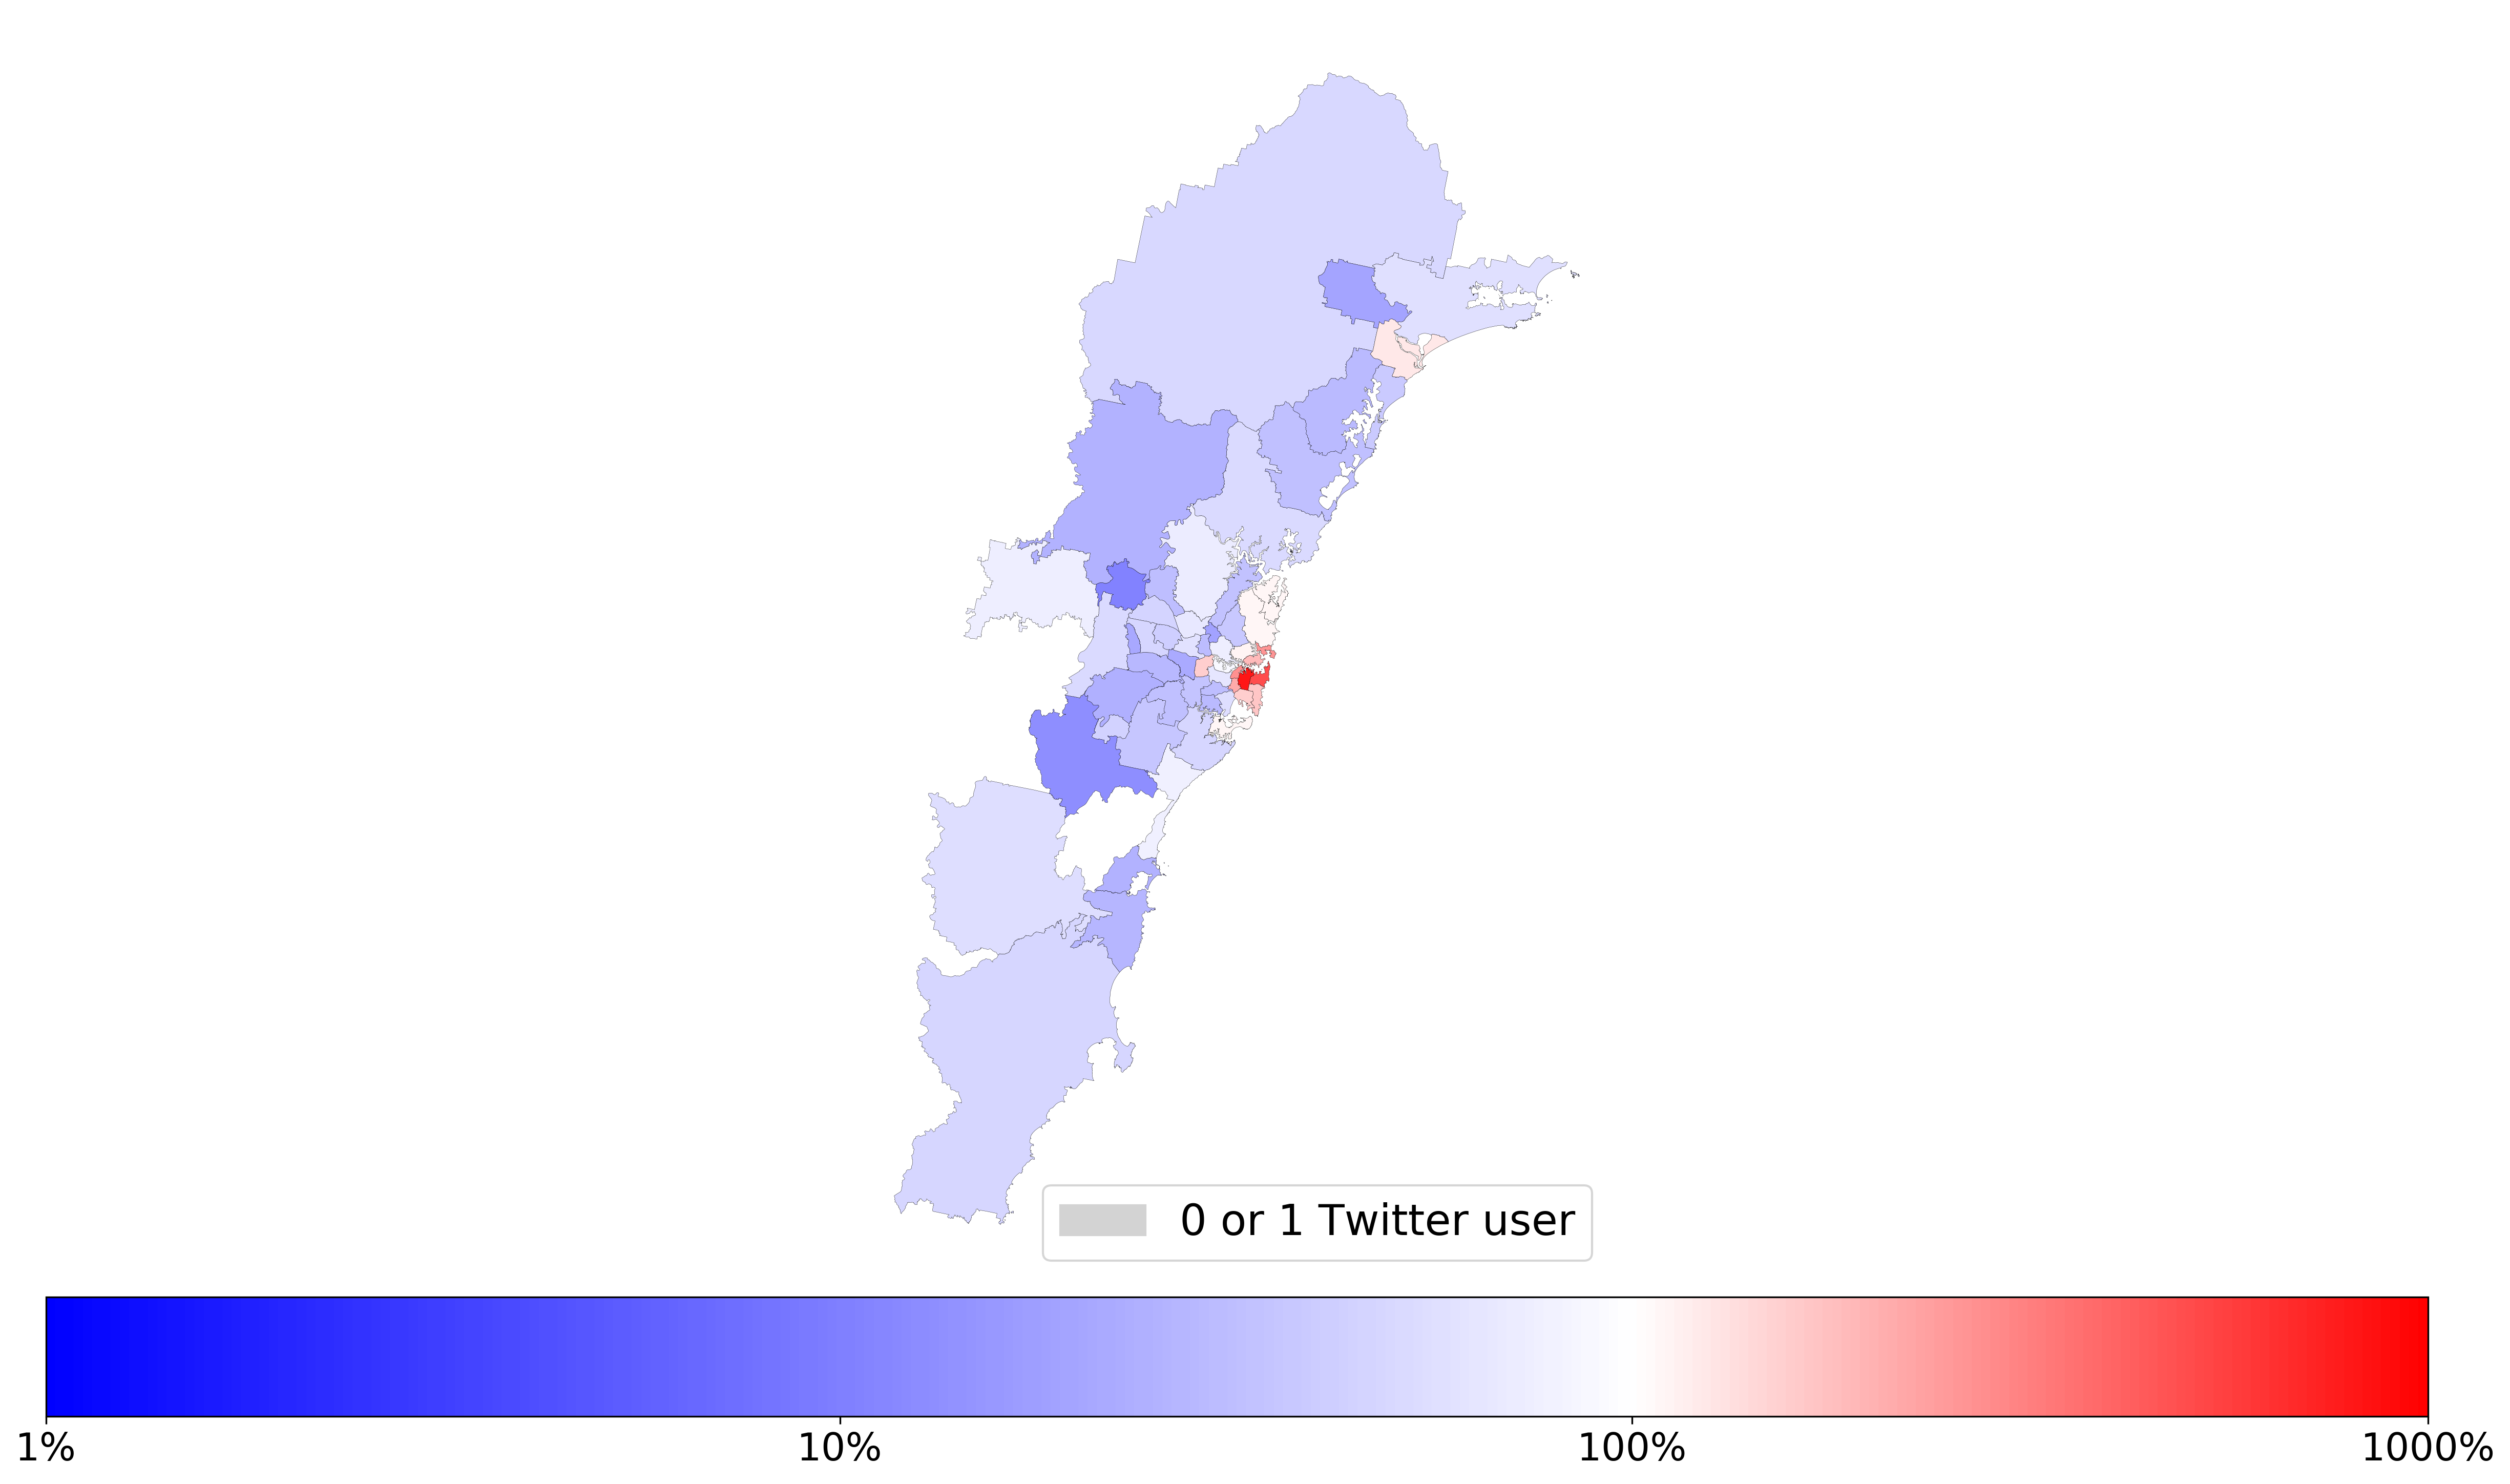

In [209]:
poprep.plot_geo_rep_aus_sao(study_zone_copy)

(0.0005, 0.5)

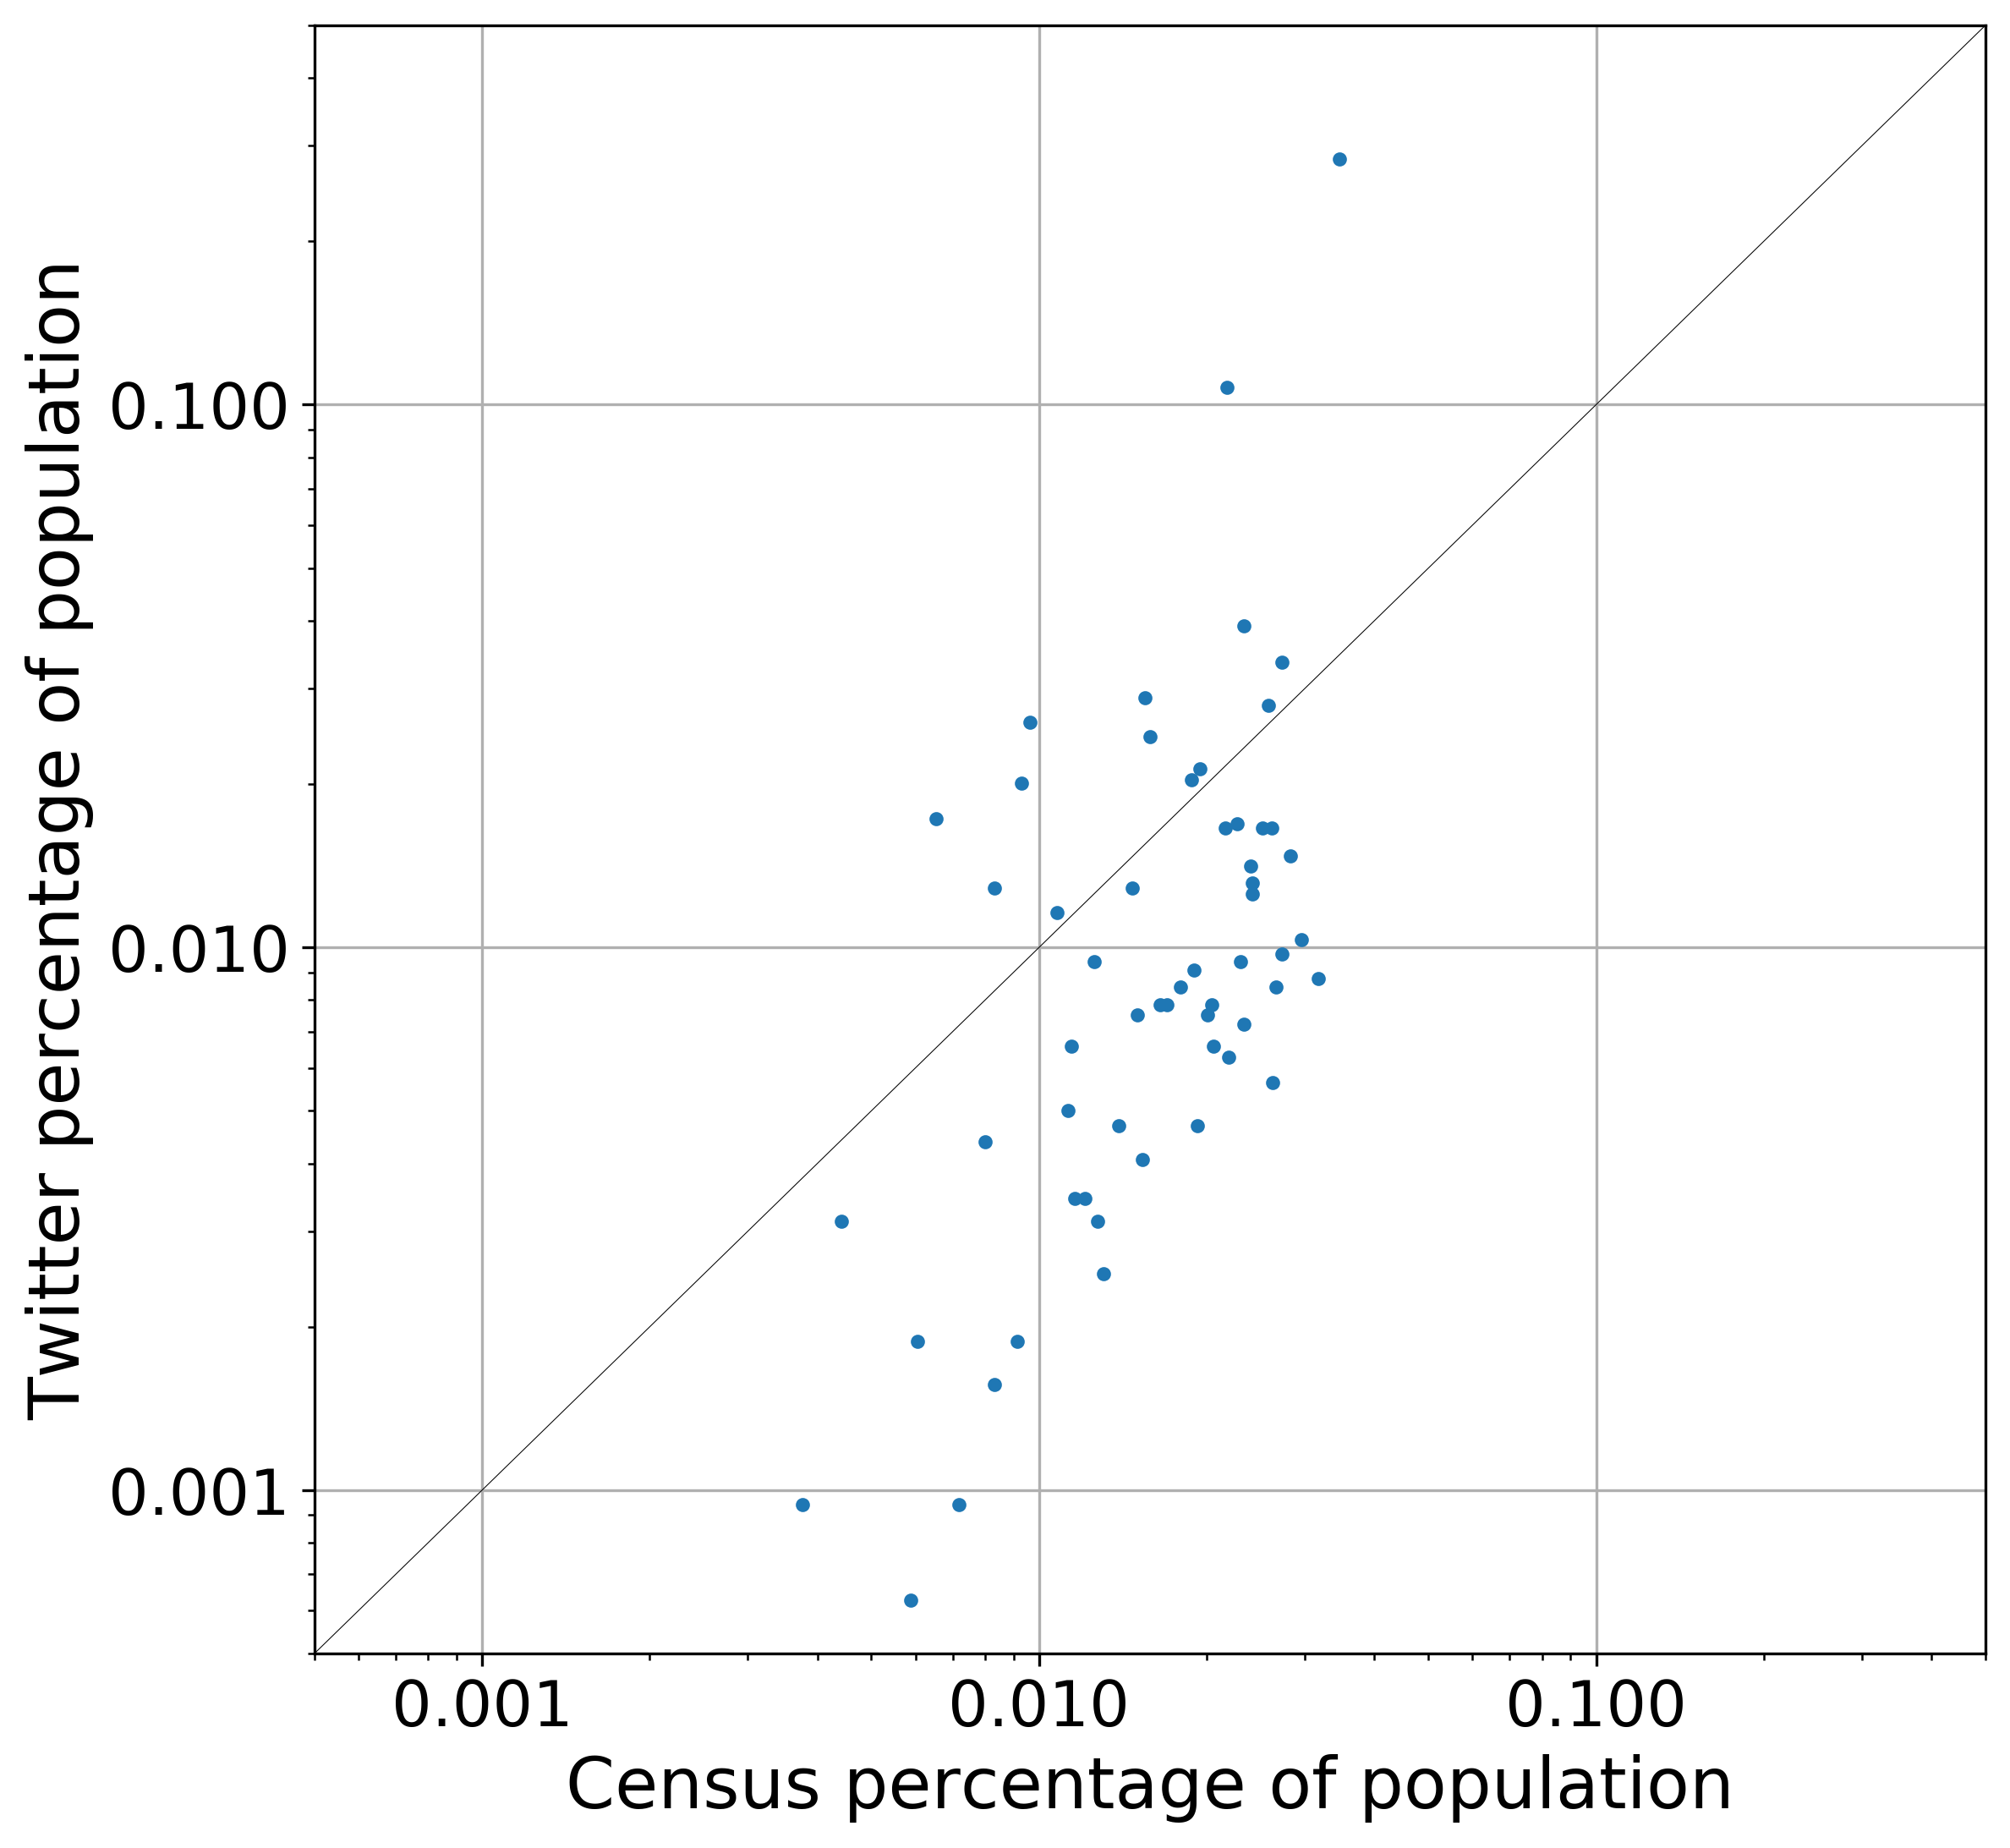

In [207]:
from matplotlib.ticker import ScalarFormatter
ax = poprep.plot_corr_aus_sao(study_zone)
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
ax.set_xlim((0.0005, 0.5))
ax.set_ylim((0.0005, 0.5))